# MINI_PROJECT-3

## This notebook is for sentiment analysis on Amazon reviews

# OVERVIEW
This dataset contains 3600000 Amazon reviews from 6,643,669 users on 2,441,053 products, from the Stanford Network Analysis Project (SNAP). I have taken sample of 5000 rows to analyze the data.

# ORIGIN
The Amazon reviews dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review.

# DESCRIPTION
The Amazon reviews polarity dataset is constructed by taking review score 1 and 2 as negative, and 4 and 5 as positive. Samples of score 3 is ignored. In the dataset, class 1 is the negative and class 2 is the positive. 

The dataset contains polarity, title, text. 

These 3 columns in them, correspond to class index (1 or 2), review title and review text.

* polarity - 1 for negative and 2 for positive
* title - review heading
* text - review body

# PROBLEM STATEMENT

Today, individuals, businesses, institutions, and governments are increasingly using information fromsocial media to  inform   their   decisions. When a person wants to buy a product, he nolonger only asks people around him, but gets a lot of comments, discussions and other informationabout the product from the Internet. For an organization, the evaluation of its products and servicescan also be obtained through the Internet. Similarly, it is easy for governments to get public feedbackon their policies, as well as to learn about important events in other countries. However, due to theproliferation of various websites, online discovery and monitoring of opinion websites and extractinginformation  from  them  is   still  a  difficult  task.   The average  human  reader   will  have  a  hard  timeidentifying   relevant   sites,   extracting   and   summarizing   comments   from   them.   Therefore,   anautomated emotional analysis system is needed

This notebook selects dataset “Amazon Reviews” from Kaggle and would like to do a sentimental analysis about the Amazon reviews by Python. And we also detect the positive and negative feedback and visualize the contents by word cloud and by different plottings and predict the ratings from the reviews by applying Count and TF-IDF Vectorizers on reviews and using some classification models like SVM,RandomForest,GradientBoosting and then compare the accuracy of different machine learning algorithms

# SELECTED MODEL

Supervised Machine Learning is being used by many organizations to identify and solve business problems. The two types of algorithms commonly used are Classification and Regression.

In this notebook, the focus will be on Classification. Classification models are models which predict a discrete outcome like predicting whether target reviews for any company is positive or negative and we will implement the following classification models using scikit-learn:

- Support Vector Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

# EVALUATION METRICS

We will evaluate the performance of the model using two metrics - Accuracy and F1-Score. 

- Accuracy

One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

        Accuracy = Number of correct predictions / Total number of predictions.

- F1-Score

This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

        F1-Score = 2*((precision*recall)/(precision+recall))

 Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
 
 Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes 



# STEPS

In this notebook, we will follow the following steps:

Step 1 - Loading the required libraries and modules.

Step 2 - Loading the data and performing basic data checks.

Step 3 - Performing some exploratory data analysis

Step 4 - Inspecting data by cleaning and converting data ignoring stopwords, punctuations and applying lemmatisation.

Step 5 - Creating dataframes for predictor and target variables and splitting training and test datasets.

Step 6 - Applying Feature engineering and Modelling using some classification models. We will be repeating Step 5 for the various classification models.

Step 7 - Trying some usecases on some reviews and predicting whether there are positive or negative reviews


# Step 1: Import libraries
- Import libraries to eliminate writing code from scratch


In [1]:
import pandas as pd
import numpy as np

import regex as re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objs as go
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud,STOPWORDS



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

# Step 2: Read the Data

- Read the data into a dataframe
- Perform some basic structural cleaning to facilitate the work

In [2]:
df = pd.read_csv(r'C:\Users\Subbu\Documents\Github2021\DSgithub\labs\Data\amazon_review_polarity_csv\train.csv', header = None)

In [3]:
df

0                                                  1  \
0        2                     Stuning even for the non-gamer   
1        2              The best soundtrack ever to anything.   
2        2                                           Amazing!   
3        2                               Excellent Soundtrack   
4        2  Remember, Pull Your Jaw Off The Floor After He...   
...     ..                                                ...   
3599995  1                                      Don't do it!!   
3599996  1                      Looks nice, low functionality   
3599997  1                         compact, but hard to clean   
3599998  1                                 what is it saying?   
3599999  2              Makes My Blood Run Red-White-And-Blue   

                                                         2  
0        This sound track was beautiful! It paints the ...  
1        I'm reading a lot of reviews saying that this ...  
2        This soundtrack is my favorite music of all ti...  
3        I truly like this soundtrack and I enjoy video...  
4        If you've played the game, you know how divine...  
...                                                    ...  
3599995  The high chair looks great when it first comes...  
3599996  I have used this highchair for 2 kids now and ...  
3599997  We have a small house, and really wanted two o...  
3599998  not sure what this book is supposed to be. It ...  
3599999  I agree that every American should read this b...  

[3600000 rows x 3 columns]

For better visualisation taking sample of 5000 rows from original dataset for the time being

In [4]:
df = df.sample(5000)

In [5]:
df = df.reset_index(inplace = False, drop = True)

In [6]:
df

0                           1  \
0     2            Hard To Put Down   
1     2                        Prey   
2     2                   Surprised   
3     1        Blu_ray did not work   
4     2        Horror soundeffects!   
...  ..                         ...   
4995  1  Defective or can't play it   
4996  1           Not sturdy enough   
4997  2               God is Good!!   
4998  1  Important Details Left Out   
4999  1         Its not all natural   

                                                      2  
0     This was my first Jack Reacher novel, but it w...  
1     This was a very well done games graphics wise....  
2     Not a real big Nicholas Sparks' movies, but th...  
3     Blu-ray did not work due to region incompatiab...  
4     I bought this cd of horror sounds after listen...  
...                                                 ...  
4995  Doesn't work in a DVD player and computer can'...  
4996  My son has never taken this case out of his be...  
4997  WOW! As a fan of the Cathedrals, I loved readi...  
4998  I'm barely into this book at the moment. So fa...  
4999  This product uses a synthetic sugar. It may ta...  

[5000 rows x 3 columns]

Renaming column names for better understanding

In [7]:
df = df.rename(columns={0: 'sentiment', 1:'review_head', 2:'review_body'})

In [8]:
df

sentiment                 review_head  \
0             2            Hard To Put Down   
1             2                        Prey   
2             2                   Surprised   
3             1        Blu_ray did not work   
4             2        Horror soundeffects!   
...         ...                         ...   
4995          1  Defective or can't play it   
4996          1           Not sturdy enough   
4997          2               God is Good!!   
4998          1  Important Details Left Out   
4999          1         Its not all natural   

                                            review_body  
0     This was my first Jack Reacher novel, but it w...  
1     This was a very well done games graphics wise....  
2     Not a real big Nicholas Sparks' movies, but th...  
3     Blu-ray did not work due to region incompatiab...  
4     I bought this cd of horror sounds after listen...  
...                                                 ...  
4995  Doesn't work in a DVD player and computer can'...  
4996  My son has never taken this case out of his be...  
4997  WOW! As a fan of the Cathedrals, I loved readi...  
4998  I'm barely into this book at the moment. So fa...  
4999  This product uses a synthetic sugar. It may ta...  

[5000 rows x 3 columns]

# Step 3:EDA


To get statistical details about dataset, we can use `describe()` method:

In [9]:
df.describe()

sentiment
count  5000.000000
mean      1.505400
std       0.500021
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000

To get concise summary about datset we can use `info()` function:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentiment    5000 non-null   int64 
 1   review_head  5000 non-null   object
 2   review_body  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


Checking number of null values present in dataset:

In [11]:
df.isnull().any()

sentiment      False
review_head    False
review_body    False
dtype: bool

Counting number of positive and negative review heads by grouping sentiments:

In [12]:
temp = df.groupby('sentiment').count()['review_head'].reset_index()
temp

sentiment  review_head
0          1         2473
1          2         2527

Counting number of positive and negative review bodies by grouping sentiments:

In [13]:
temp_body = df.groupby('sentiment').count()['review_body'].reset_index()
temp_body

sentiment  review_body
0          1         2473
1          2         2527

Text(0.5, 1.0, 'Number of positive and negative counts')

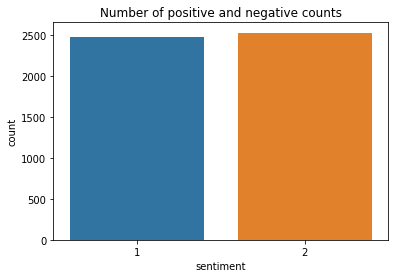

In [14]:
sns.countplot(x = 'sentiment', data = df)
plt.title('Number of positive and negative counts')

For better understanding converted values with 2 to 0's in sentiment column

In [15]:
df['sentiment'] = df['sentiment'].map({1:1,2:0})

From the above image, we can interpret that we don't have class imbalance and positives and negatives are equal

In [16]:
# pip install plotly

In [17]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.review_head,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

Counting number of words present in each review head and review body by using `lambda` function. 

In the function, we have `splitted` text and counted words by using `len()` function

In [18]:
#Number Of words in review head
df['Num_words_RH'] = df['review_head'].apply(lambda x:len(str(x).split())) 

#Number Of words in review body
df['Num_words_RB'] = df['review_body'].apply(lambda x:len(str(x).split()))

Let's use density plot for better understanding of distribution of words:

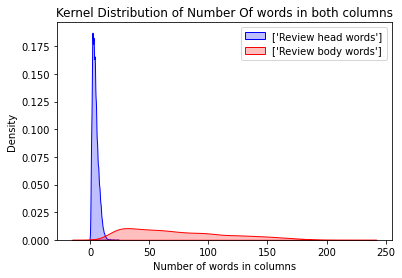

In [19]:
# plt.figure(figsize=(19,6))
plt.xlabel('Number of words in columns')
p1 = sns.kdeplot(df['Num_words_RH'], shade=True, color="b", label=['Review head words']).set_title('Kernel Distribution of Number Of words in both columns')
p1 = sns.kdeplot(df['Num_words_RB'], shade=True, color="r", label=['Review body words'])
plt.legend(loc='upper right')

From the above image, we can interpret that words in review head are less than 20, where as words in body columns are spreaded more till 200. 

Using histogram to compare both columns words and for better visualization:

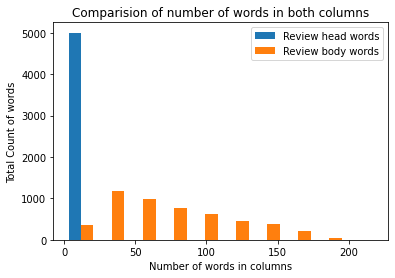

In [20]:
plt.hist([df['Num_words_RH'], df['Num_words_RB']], label=['Review head words', 'Review body words'])
plt.title('Comparision of number of words in both columns')
plt.xlabel('Number of words in columns')
plt.ylabel('Total Count of words')
plt.legend(loc='upper right')

From the above histogram we can interpret that review head column's words are ranging between (0,25) and review body column's words are spreaded and are ranging between (0,200)

Using histogram below to check count of number of words in review head column: 

Text(0, 0.5, 'Total count')

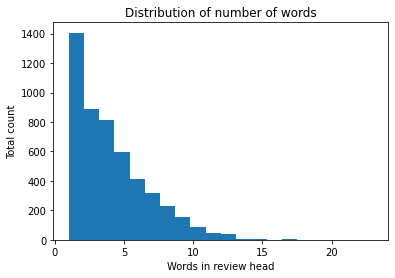

In [21]:
plt.hist(df['Num_words_RH'],bins =20)
plt.title('Distribution of number of words')
plt.xlabel('Words in review head')
plt.ylabel('Total count')

Using histogram below to check count of number of words in review body column: 

Text(0, 0.5, 'Total count')

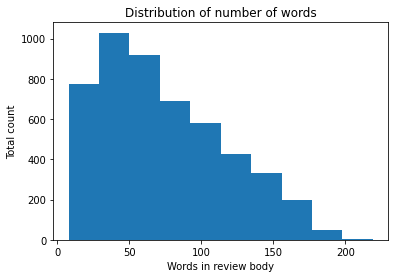

In [22]:
plt.hist(df['Num_words_RB'])
plt.title('Distribution of number of words')
plt.xlabel('Words in review body')
plt.ylabel('Total count')

In [23]:
df

sentiment                 review_head  \
0             0            Hard To Put Down   
1             0                        Prey   
2             0                   Surprised   
3             1        Blu_ray did not work   
4             0        Horror soundeffects!   
...         ...                         ...   
4995          1  Defective or can't play it   
4996          1           Not sturdy enough   
4997          0               God is Good!!   
4998          1  Important Details Left Out   
4999          1         Its not all natural   

                                            review_body  Num_words_RH  \
0     This was my first Jack Reacher novel, but it w...             4   
1     This was a very well done games graphics wise....             1   
2     Not a real big Nicholas Sparks' movies, but th...             1   
3     Blu-ray did not work due to region incompatiab...             4   
4     I bought this cd of horror sounds after listen...             2   
...                                                 ...           ...   
4995  Doesn't work in a DVD player and computer can'...             5   
4996  My son has never taken this case out of his be...             3   
4997  WOW! As a fan of the Cathedrals, I loved readi...             3   
4998  I'm barely into this book at the moment. So fa...             4   
4999  This product uses a synthetic sugar. It may ta...             4   

      Num_words_RB  
0              130  
1               41  
2               47  
3               25  
4               49  
...            ...  
4995            14  
4996            60  
4997            53  
4998            77  
4999            22  

[5000 rows x 5 columns]

In [24]:
df_sent1 = df[df['sentiment'] == 1]

In [25]:
df_sent2 = df[df['sentiment'] == 0]

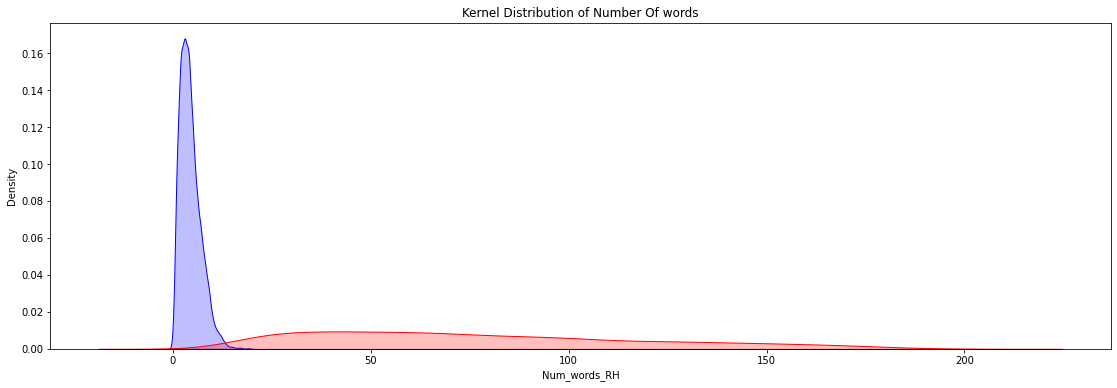

In [26]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df_sent1['Num_words_RH'], shade=True, color="b").set_title('Kernel Distribution of Number Of words')
p1 = sns.kdeplot(df_sent1['Num_words_RB'], shade=True, color="r")


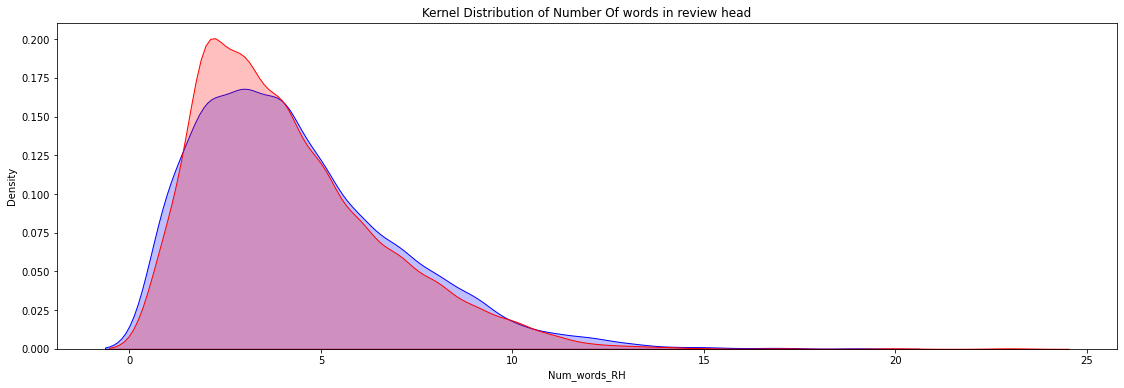

In [27]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df_sent1['Num_words_RH'], shade=True, color="b").set_title('Kernel Distribution of Number Of words in review head')
p1 = sns.kdeplot(df_sent2['Num_words_RH'], shade=True, color="r")

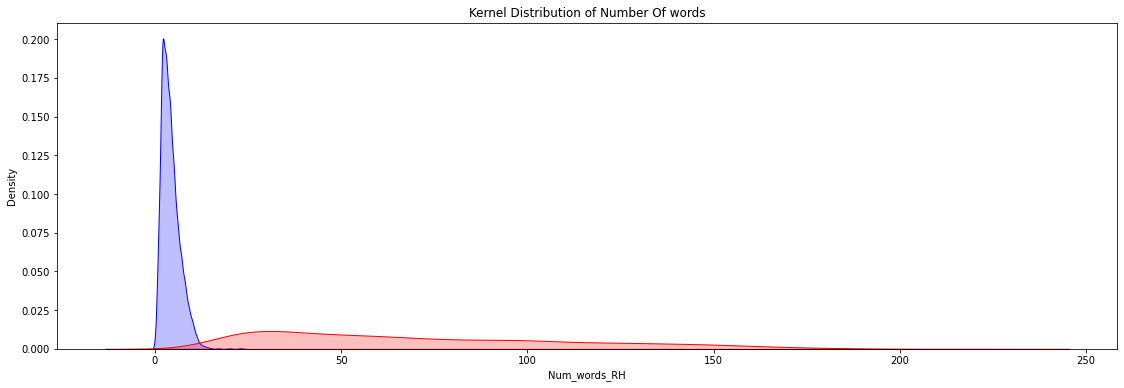

In [28]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df_sent2['Num_words_RH'], shade=True, color="b").set_title('Kernel Distribution of Number Of words')
p1 = sns.kdeplot(df_sent2['Num_words_RB'], shade=True, color="r")


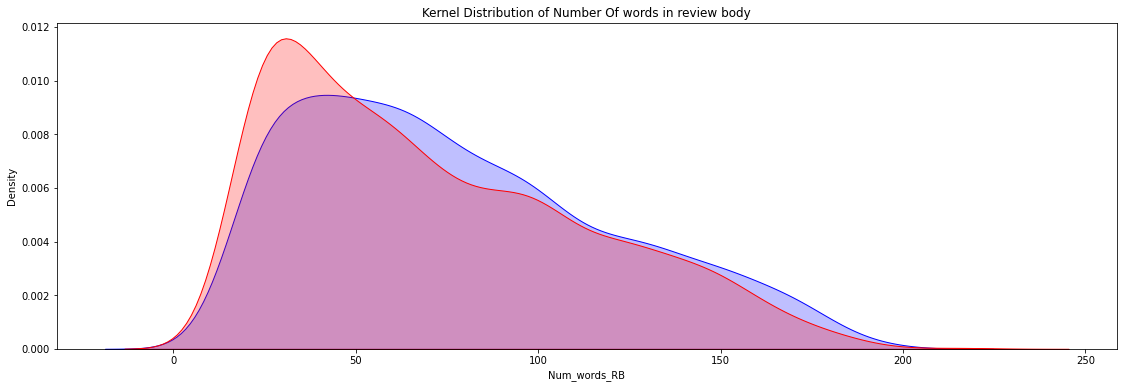

In [29]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df_sent1['Num_words_RB'], shade=True, color="b").set_title('Kernel Distribution of Number Of words in review body')
p1 = sns.kdeplot(df_sent2['Num_words_RB'], shade=True, color="r")

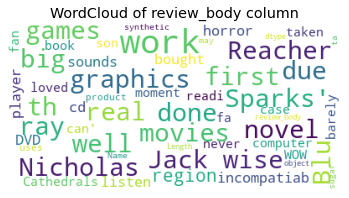

In [30]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df[['review_head','review_body']]

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['review_body']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title('WordCloud of review_body column')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

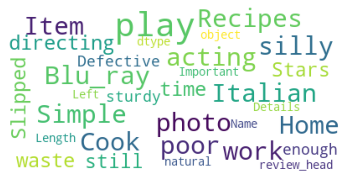

In [31]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df_sent1[['review_head','review_body']]

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['review_head']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

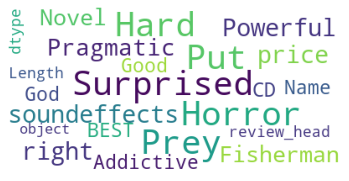

In [32]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df_sent2[['review_head','review_body']]

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['review_head']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Step 4: Inspect data

# Cleaning the Corpus
Now Before We Dive into extracting information out of words in review head and review body,let's first clean the data

Here, we are defining function to eliminate to make text lowercase, remove text in square brackets,remove links,remove punctuations and remove words containing numbers


In [33]:
#Clean Text
def clean_text(text):
    
    text = str(text).lower()

    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)

    # remove double quotes
    text = re.sub(r'"', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [34]:
df['new'] = df['review_head'].apply(clean_text)

In [35]:
df

sentiment                 review_head  \
0             0            Hard To Put Down   
1             0                        Prey   
2             0                   Surprised   
3             1        Blu_ray did not work   
4             0        Horror soundeffects!   
...         ...                         ...   
4995          1  Defective or can't play it   
4996          1           Not sturdy enough   
4997          0               God is Good!!   
4998          1  Important Details Left Out   
4999          1         Its not all natural   

                                            review_body  Num_words_RH  \
0     This was my first Jack Reacher novel, but it w...             4   
1     This was a very well done games graphics wise....             1   
2     Not a real big Nicholas Sparks' movies, but th...             1   
3     Blu-ray did not work due to region incompatiab...             4   
4     I bought this cd of horror sounds after listen...             2   
...                                                 ...           ...   
4995  Doesn't work in a DVD player and computer can'...             5   
4996  My son has never taken this case out of his be...             3   
4997  WOW! As a fan of the Cathedrals, I loved readi...             3   
4998  I'm barely into this book at the moment. So fa...             4   
4999  This product uses a synthetic sugar. It may ta...             4   

      Num_words_RB                         new  
0              130            hard to put down  
1               41                        prey  
2               47                   surprised  
3               25        blu_ray did not work  
4               49        horror soundeffects!  
...            ...                         ...  
4995            14  defective or can't play it  
4996            60           not sturdy enough  
4997            53               god is good!!  
4998            77  important details left out  
4999            22         its not all natural  

[5000 rows x 6 columns]

We can see cleaned `review_head` column in `new` column in the above dataframe 

In [36]:
df['new_body'] = df['review_body'].apply(clean_text)

We can see cleaned `review_body` column in `new_body` column in the above dataframe 

# Processing text:

Processing text with the nlp object returns a Doc object that holds all information about the tokens, their linguistic features and their relationships.

In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
# def tokenize(text):
    
#     #process text
#     doc = nlp(text)
    
#     token_list = []
#     for i,t in enumerate(doc):
#         token_list.append(t.text)
#     return token_list

In [39]:
# #Removing stopwords
# def remove_stopwords(text):
#     #process text
#     words = nlp(text)
    
#     token_list = []
#     for token in words:
#         token_list.append(token.text)
        
#     wordsFiltered  =[] 
#     for word in token_list:
#         lexeme = nlp.vocab[word]
#         if lexeme.is_stop == False:
#             wordsFiltered.append(word)
            
#     return wordsFiltered

In [40]:
# df['new'] = df['review_head'].apply(remove_stopwords)

In [41]:
# #cleaning text
# def remove_stopwords(text):
#     #process text
#     words = nlp(text)
    
# #     token_list = []
# #     for token in words:
# #         token_list.append(token.text)
        
#     wordsFiltered  =[] 
#     for word in words:
# #         lexeme = nlp.vocab[word]
#         if word.is_stop == False:
#             if word.is_punct == False:
#                 wordsFiltered.append(word.lemma_)
            
#     return wordsFiltered

In the cell below, we are defining function and using `spacy` built-in library to access token attributes, remove punctuations and convert words into their base forms which is lemmatisation

In [42]:
def convert_text(text):
    #process text
    doc = nlp(text)
    
    new = ' '
    for i,t in enumerate(doc):
        if t.is_stop == False:
            if t.is_punct == False:
                new = new + ' ' + t.lemma_
    return new

In [43]:
df['new'] = df['new'].apply(convert_text)

In [44]:
df

sentiment                 review_head  \
0             0            Hard To Put Down   
1             0                        Prey   
2             0                   Surprised   
3             1        Blu_ray did not work   
4             0        Horror soundeffects!   
...         ...                         ...   
4995          1  Defective or can't play it   
4996          1           Not sturdy enough   
4997          0               God is Good!!   
4998          1  Important Details Left Out   
4999          1         Its not all natural   

                                            review_body  Num_words_RH  \
0     This was my first Jack Reacher novel, but it w...             4   
1     This was a very well done games graphics wise....             1   
2     Not a real big Nicholas Sparks' movies, but th...             1   
3     Blu-ray did not work due to region incompatiab...             4   
4     I bought this cd of horror sounds after listen...             2   
...                                                 ...           ...   
4995  Doesn't work in a DVD player and computer can'...             5   
4996  My son has never taken this case out of his be...             3   
4997  WOW! As a fan of the Cathedrals, I loved readi...             3   
4998  I'm barely into this book at the moment. So fa...             4   
4999  This product uses a synthetic sugar. It may ta...             4   

      Num_words_RB                       new  \
0              130                      hard   
1               41                      prey   
2               47                  surprise   
3               25              blu_ray work   
4               49        horror soundeffect   
...            ...                       ...   
4995            14            defective play   
4996            60                    sturdy   
4997            53                  god good   
4998            77    important detail leave   
4999            22                   natural   

                                               new_body  
0     this was my first jack reacher novel, but it w...  
1     this was a very well done games graphics wise....  
2     not a real big nicholas sparks' movies, but th...  
3     blu-ray did not work due to region incompatiab...  
4     i bought this cd of horror sounds after listen...  
...                                                 ...  
4995  doesn't work in a dvd player and computer can'...  
4996  my son has never taken this case out of his be...  
4997  wow! as a fan of the cathedrals, i loved readi...  
4998  i'm barely into this book at the moment. so fa...  
4999  this product uses a synthetic sugar. it may ta...  

[5000 rows x 7 columns]

We can see converted `review_head` column in `new` column in the above dataframe 

In [45]:
df['new_body'] = df['new_body'].apply(convert_text)

We can see converted `review_body` column in `new_body` column in the above dataframe 

In [46]:
# df["new_col"] = df["review_head"].apply(lambda text: " ".join(token.lemma_ for token in nlp(text) if not token.is_punct | token.is_stop))

In [47]:
# # five most common tokens
# def most_common(text):
    
#     doc = nlp(text)
    
#     token_list = []
#     common_words = []
    
#     for i,token in enumerate(doc):
#         token_list.append(token.text)
#         for words in enumerate(token_list):
#             word_freq = Counter(words)
#             common_words.append(word_freq.most_common(5))
#     return common_words

In the below cell, defining function to check number of words are there in cleaned and converted columns:

In [48]:
def count_words(text):
    return len(text.split())

In [49]:
df['new_count_words'] = df['new'].apply(count_words)

In [50]:
df['newbody_count_words'] = df['new_body'].apply(count_words)

In [51]:
df

sentiment                 review_head  \
0             0            Hard To Put Down   
1             0                        Prey   
2             0                   Surprised   
3             1        Blu_ray did not work   
4             0        Horror soundeffects!   
...         ...                         ...   
4995          1  Defective or can't play it   
4996          1           Not sturdy enough   
4997          0               God is Good!!   
4998          1  Important Details Left Out   
4999          1         Its not all natural   

                                            review_body  Num_words_RH  \
0     This was my first Jack Reacher novel, but it w...             4   
1     This was a very well done games graphics wise....             1   
2     Not a real big Nicholas Sparks' movies, but th...             1   
3     Blu-ray did not work due to region incompatiab...             4   
4     I bought this cd of horror sounds after listen...             2   
...                                                 ...           ...   
4995  Doesn't work in a DVD player and computer can'...             5   
4996  My son has never taken this case out of his be...             3   
4997  WOW! As a fan of the Cathedrals, I loved readi...             3   
4998  I'm barely into this book at the moment. So fa...             4   
4999  This product uses a synthetic sugar. It may ta...             4   

      Num_words_RB                       new  \
0              130                      hard   
1               41                      prey   
2               47                  surprise   
3               25              blu_ray work   
4               49        horror soundeffect   
...            ...                       ...   
4995            14            defective play   
4996            60                    sturdy   
4997            53                  god good   
4998            77    important detail leave   
4999            22                   natural   

                                               new_body  new_count_words  \
0       jack reacher novel wo book hard finish recor...                1   
1       game graphic wise creative way spin fps game...                1   
2       real big nicholas spark movie decide read bo...                1   
3       blu ray work region incompatiability state d...                2   
4       buy cd horror sound listen year bring alot g...                2   
...                                                 ...              ...   
4995        work dvd player computer read disappointing                2   
4996    son take case bedroom plastic hinge come unh...                1   
4997    wow fan cathedral love read   sr member lord...                2   
4998    barely book moment far impressed book leave ...                3   
4999    product use synthetic sugar taste good sweet...                1   

      newbody_count_words  
0                      49  
1                      16  
2                      22  
3                      10  
4                      23  
...                   ...  
4995                    6  
4996                   24  
4997                   19  
4998                   37  
4999                   10  

[5000 rows x 9 columns]

In the above dataframe, we can see number of words are there in `review_head` and `review_body` columns after converting in `new_count_words`,`newbody_count_words` columns respectively. 

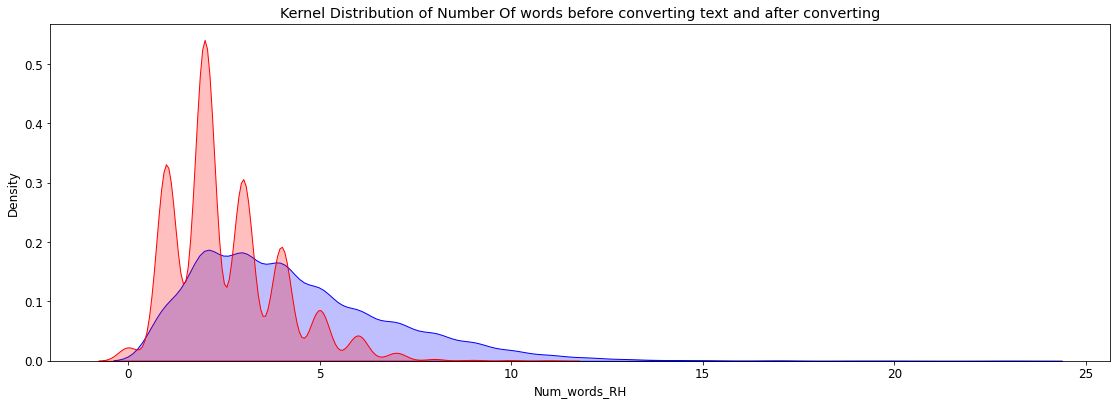

In [52]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df['Num_words_RH'], shade=True, color="b").set_title('Kernel Distribution of Number Of words before converting text and after converting')
p1 = sns.kdeplot(df['new_count_words'], shade=True, color="r")

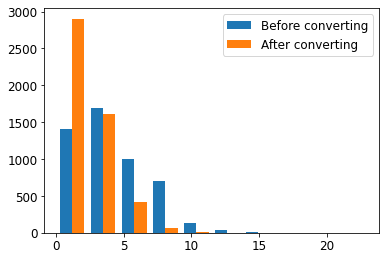

In [53]:
plt.hist([df['Num_words_RH'], df['new_count_words']], label=['Before converting', 'After converting'])
plt.legend(loc='upper right')

Text(0, 0.5, 'count')

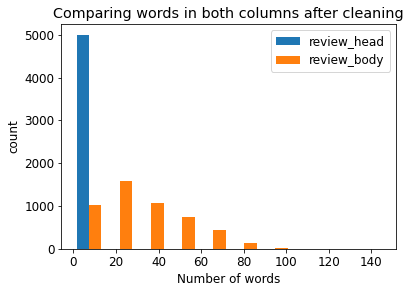

In [54]:
plt.hist([df['new_count_words'], df['newbody_count_words']], label=['review_head', 'review_body'])
plt.legend(loc='upper right')
plt.title('Comparing words in both columns after cleaning')
plt.xlabel('Number of words')
plt.ylabel('count')

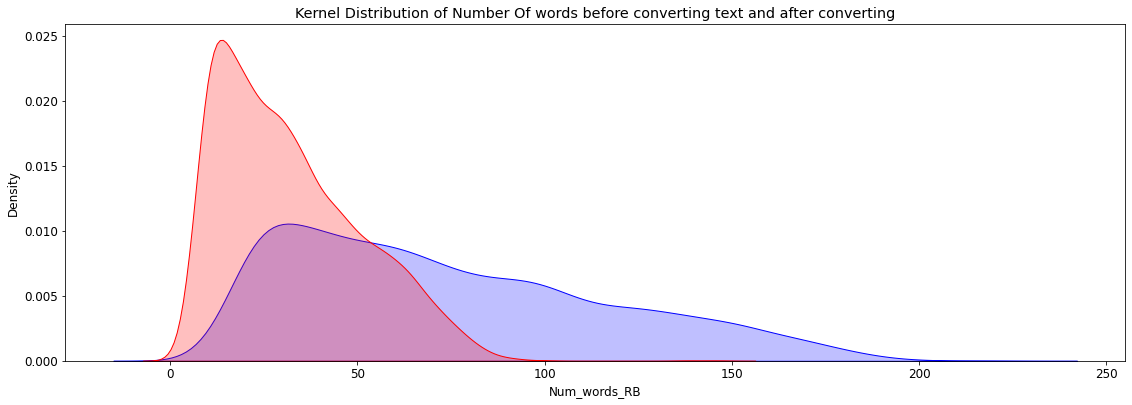

In [55]:
plt.figure(figsize=(19,6))
p1 = sns.kdeplot(df['Num_words_RB'], shade=True, color="b").set_title('Kernel Distribution of Number Of words before converting text and after converting')
p1 = sns.kdeplot(df['newbody_count_words'], shade=True, color="r")

Text(0.5, 1.0, 'Comparision of num of words in review_body after data cleaning and converting')

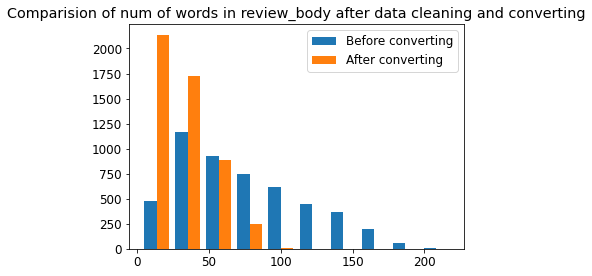

In [56]:
plt.hist([df['Num_words_RB'], df['newbody_count_words']], label=['Before converting', 'After converting'])
plt.legend(loc='upper right')
plt.title('Comparision of num of words in review_body after data cleaning and converting')

Most Common words in our Target- converted review head column:


In [57]:
df['temp_list'] = df['new'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

Text(0, 0.5, 'Total count')

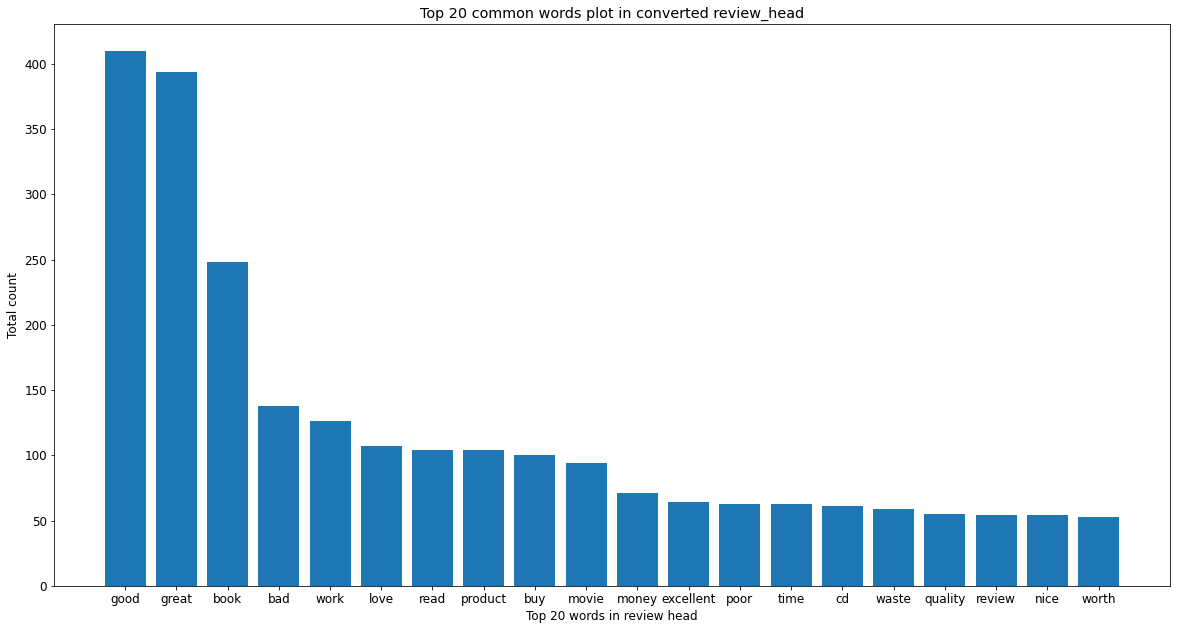

In [58]:
fig = plt.figure(figsize=(20,10))
plt.bar(temp['Common_words'], temp['count'])
plt.title('Top 20 common words plot in converted review_head')
plt.xlabel('Top 20 words in review head')
plt.ylabel('Total count')

In [59]:
df['temp_list'] = df['new_body'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

Text(0, 0.5, 'Total count')

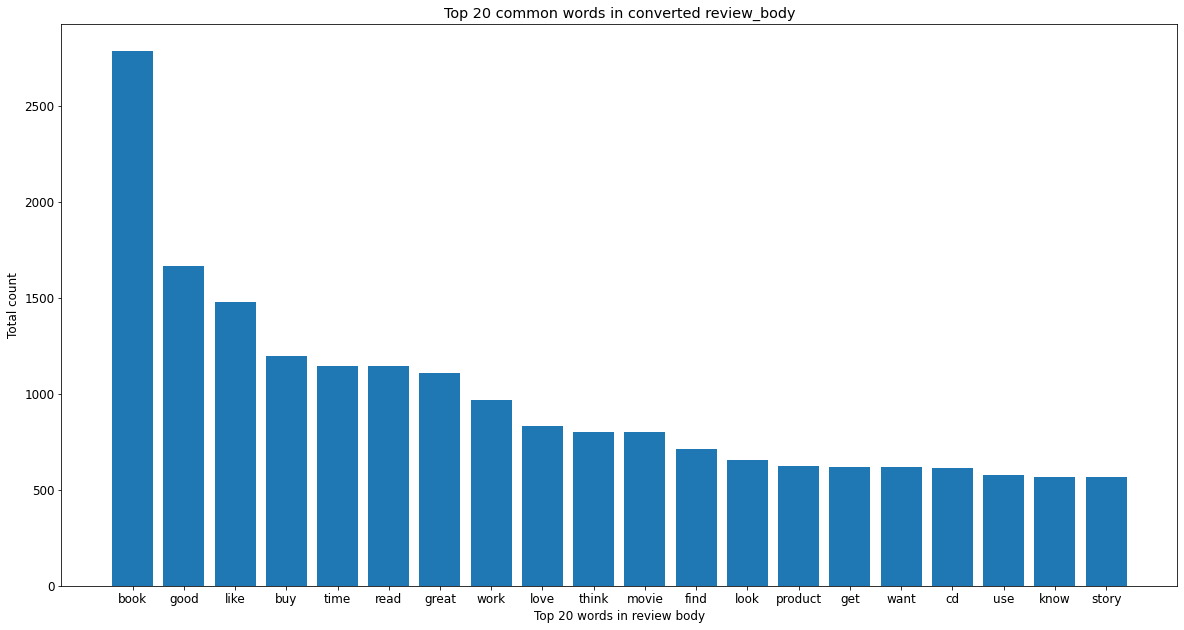

In [60]:
fig = plt.figure(figsize=(20,10))
plt.bar(temp['Common_words'], temp['count'])
plt.title('Top 20 common words in converted review_body')
plt.xlabel('Top 20 words in review body')
plt.ylabel('Total count')

# Step 5 :  Split the data into train and test

In [61]:
X = df['new']
y = df['sentiment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000,)
(4000,)
(1000,)
(1000,)


In [62]:
X1 = df['new_body']
y = df['sentiment']

# split the dataset
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)
print(X1_train.shape)
print(y_train.shape)
print(X1_test.shape)
print(y_test.shape)

(4000,)
(4000,)
(1000,)
(1000,)


# Calculating baseline accuracy

In [63]:
from statistics import *
 
guess = mode(y_train)

y_pred_base = [guess] * len(y_test)

#getting score

score = accuracy_score(y_test, y_pred_base)
score

0.501

# Step 6: Feature Engineering and Modelling

### Count Vectors as features

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

Applying `CountVectorizer()` on review_head cleaned and splitted data by creating vectorizer object, transforming and fitting train data to `A` and transforming test data to `B`

In [64]:
# create a matrix of word counts from the text
counts = CountVectorizer()

# do the actual counting
A = counts.fit_transform(X_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

Applying `CountVectorizer()` on review_body cleaned and splitted data by creating vectorizer object, transforming and fitting train data to `A1` and transforming test data to `B1`

In [139]:
# do the actual counting
A1 = counts.fit_transform(X1_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B1 = counts.transform(X1_test)


Now using SVC classifier on both head and body columns transormed data to predict traget. 

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [66]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A, y_train)

# make predictions based on the test data
predictions = classifier.predict(B)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.6970
Classification report of SVC:               precision    recall  f1-score   support

           0       0.74      0.61      0.67       501
           1       0.67      0.79      0.72       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.69      1000
weighted avg       0.70      0.70      0.69      1000



From the above report, we can interpret that accuracy of SVC on review_head column is 71.7 and f1 score is 72 which is quite greater than baseline accuracy

In [136]:
# create a classifier using SVC
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_body training data
classifier.fit(A1, y_train)

# make predictions based on the test data
predictions = classifier.predict(B1)
predictions

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy: 0.7880
Classification report of SVC:               precision    recall  f1-score   support

           0       0.79      0.79      0.79       501
           1       0.79      0.79      0.79       499

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



From the above report, we can interpret that accuracy of SVC on review_body column is 77.7 and f1 score is 78 which is quite greater than baseline accuracy and accuracy of review_head column

In [68]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using SVC
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A, y_train)

# make predictions based on the test data
predictions = RFclassifier.predict(B)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.6940
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.71      0.65      0.68       501
           1       0.68      0.73      0.71       499

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000

Wall time: 5.27 s


From the above report, we can interpret that accuracy of RandomForestClassifier on review_head column is 72.9 and f1 score is 73 which is quite greater than baseline accuracy and also accuracy of SVM

In [140]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A1, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B1)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.7830
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.77      0.80      0.79       501
           1       0.79      0.77      0.78       499

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

Wall time: 3.22 s


From the above report, we can interpret that accuracy of RandomForestClassifier on review_body column is 78 and f1 score is 79 which is quite greater than baseline accuracy and also accuracy of SVM

In [70]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.6620
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.77      0.46      0.58       501
           1       0.61      0.86      0.72       499

    accuracy                           0.66      1000
   macro avg       0.69      0.66      0.65      1000
weighted avg       0.69      0.66      0.65      1000



From the above report, we can interpret that accuracy of GradientBoostingClassifier on review_head column is 69 and f1 score is 69 which is quite greater than baseline accuracy but comparitively less when compared to accuracy of SVM and RandomForest

In [71]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A1, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B1)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.7630
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.79      0.72      0.75       501
           1       0.74      0.81      0.77       499

    accuracy                           0.76      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000



From the above report, we can interpret that accuracy of GradientBoostingClassifier on review_body column is 74 and f1 score is 74 which is quite greater than baseline accuracy but comparitively less when compared to accuracy of SVM and RandomForest

### TF-IDF Vectors as features

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

Term Frequency (tf) - It gives us the recurrence of the word in each report in the corpus. It is the proportion of the number of times the word shows up in a report contrasted with the all-out the number of words in that record. It increments as the quantity of events of that word inside the record increments.

Inverse Data Frequency (idf) - It is used to figure the heaviness of uncommon words over all reports in the corpus. The words that happen seldom in the corpus have a high IDF score.

- Word level
- N-Gram level
- Character level

Applying `TfidfVectorizer()` on review_head cleaned and splitted data by creating vectorizer object with word analyzer, transforming and fitting train data to `A` and transforming test data to `B`

In [72]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)


# do the actual counting
A = tfidf_vect.fit_transform(X_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf_vect.transform(X_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
Wall time: 66.3 ms


Applying `TfidfVectorizer()` on review_body cleaned and splitted data by creating vectorizer object with word analyzer, transforming and fitting train data to `A1` and transforming test data to `B1`

In [144]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

# do the actual counting
A1 = tfidf_vect.fit_transform(X1_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B1 = tfidf_vect.transform(X1_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
Wall time: 214 ms


Applying `TfidfVectorizer()` on review_head cleaned and splitted data by creating vectorizer object with word analyzer and ngram_range, transforming and fitting train data to `A_1` and transforming test data to `B_1`

In [74]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

# do the actual counting
A_1 = tfidf_vect_ngram.fit_transform(X_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B_1 = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
Wall time: 153 ms


Applying `TfidfVectorizer()` on review_body cleaned and splitted data by creating vectorizer object with word analyzer and ngram_range, transforming and fitting train data to `A1_1` and transforming test data to `B1_1`

In [142]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

# do the actual counting
A1_1 = tfidf_vect_ngram.fit_transform(X1_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B1_1 = tfidf_vect_ngram.transform(X1_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
Wall time: 1.04 s


Applying `TfidfVectorizer()` on review_head cleaned and splitted data by creating vectorizer object with char analyzer and ngram_range, transforming and fitting train data to `A_2` and transforming test data to `B_2`

In [76]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)


# do the actual counting
A_2 = tfidf_vect_ngram_chars.fit_transform(X_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B_2 = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')
Wall time: 264 ms


Applying `TfidfVectorizer()` on review_body cleaned and splitted data by creating vectorizer object with char analyzer and ngram_range, transforming and fitting train data to `A1_2` and transforming test data to `B1_2`

In [77]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)


# do the actual counting
A1_2 = tfidf_vect_ngram_chars.fit_transform(X1_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B1_2 = tfidf_vect_ngram_chars.transform(X1_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')
Wall time: 2.97 s


Now using SVC classifier on both head and body columns TF-IDF transormed data to predict traget. 

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

In [78]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A, y_train)

# make predictions based on the test data
predictions = classifier.predict(B)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.7270
Classification report of SVC:               precision    recall  f1-score   support

           0       0.74      0.70      0.72       501
           1       0.72      0.75      0.73       499

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



From the above report, we can interpret that accuracy of SVC with word analyzer on review_head column is 74.6 and f1 score is 75 which is quite greater than baseline accuracy

In [145]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A1, y_train)

# make predictions based on the test data
predictions = classifier.predict(B1)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.7980
Classification report of SVC:               precision    recall  f1-score   support

           0       0.80      0.79      0.80       501
           1       0.79      0.81      0.80       499

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



From the above report, we can interpret that accuracy of SVC with word analyzer on review_body column is 80.2 and f1 score is 80 which is quite greater than baseline accuracy

In [80]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A_1, y_train)

# make predictions based on the test data
predictions = classifier.predict(B_1)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.5500
Classification report of SVC:               precision    recall  f1-score   support

           0       0.77      0.15      0.24       501
           1       0.53      0.96      0.68       499

    accuracy                           0.55      1000
   macro avg       0.65      0.55      0.46      1000
weighted avg       0.65      0.55      0.46      1000



From the above report, we can interpret that accuracy of SVC with word analyzer and n-gram range on review_head column is 56.3 and f1 score is 56 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzer 

In [81]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A1_1, y_train)

# make predictions based on the test data
predictions = classifier.predict(B1_1)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.6600
Classification report of SVC:               precision    recall  f1-score   support

           0       0.68      0.60      0.64       501
           1       0.64      0.72      0.68       499

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



From the above report, we can interpret that accuracy of SVC with word analyzer and n-gram range on review_body column is 67.7 and f1 score is 68 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzer

In [82]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A_2, y_train)

# make predictions based on the test data
predictions = classifier.predict(B_2)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.7210
Classification report of SVC:               precision    recall  f1-score   support

           0       0.72      0.73      0.72       501
           1       0.72      0.71      0.72       499

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



From the above report, we can interpret that accuracy of SVC with char analyzer on review_head column is 74.3 and f1 score is 74 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzer and greater than ngram range

In [83]:
# create a classifier using SVC 
classifier = SVC(kernel='rbf', probability=True)

# train the classifier with the transformed review_head training data
classifier.fit(A1_2, y_train)

# make predictions based on the test data
predictions = classifier.predict(B1_2)
predictions

# check the accuracy
print('Accuracy of SVC: %.4f' % accuracy_score(y_test, predictions))
print('Classification report of SVC:',classification_report(y_test, predictions))

Accuracy of SVC: 0.7810
Classification report of SVC:               precision    recall  f1-score   support

           0       0.78      0.79      0.78       501
           1       0.78      0.77      0.78       499

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



From the above report, we can interpret that accuracy of SVC with char analyzer on review_body column is 77.9 and f1 score is 78 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzer and greater than ngram range

In [84]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using SVC
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A, y_train)

# make predictions based on the test data
predictions = RFclassifier.predict(B)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.7020
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.73      0.64      0.68       501
           1       0.68      0.76      0.72       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.71      0.70      0.70      1000

Wall time: 5.02 s


From the above report, we can interpret that accuracy of RFC with word analyzer on review_head column is 73.6 and f1 score is 74 which is quite greater than baseline accuracy

In [85]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A1, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B1)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.7700
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.77      0.77      0.77       501
           1       0.77      0.77      0.77       499

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

Wall time: 4.45 s


From the above report, we can interpret that accuracy of RFC with word analyzer on review_body column is 80.5 and f1 score is 81 which is quite greater than baseline accuracy and also greater than accuracy of SVM word analyzer

In [86]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A_1, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B_1)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.5510
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.78      0.14      0.24       501
           1       0.53      0.96      0.68       499

    accuracy                           0.55      1000
   macro avg       0.66      0.55      0.46      1000
weighted avg       0.66      0.55      0.46      1000

Wall time: 5.07 s


From the above report, we can interpret that accuracy of RFC with word analyzer and n-gram range on review_head column is 56.3 and f1 score is 56 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzers 

In [87]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A1_1, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B1_1)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.6260
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.66      0.53      0.59       501
           1       0.60      0.73      0.66       499

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.62      1000
weighted avg       0.63      0.63      0.62      1000

Wall time: 5.55 s


From the above report, we can interpret that accuracy of RFC with word analyzer and n-gram range on review_body column is 66.9 and f1 score is 67 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzers 

In [88]:
%%time
# Bagging (Random Forest) on Count Vectors

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A_2, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B_2)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.6960
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.70      0.70      0.70       501
           1       0.70      0.69      0.69       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000

Wall time: 9.09 s


From the above report, we can interpret that accuracy of RFC with char analyzer on review_head column is 73.7 and f1 score is 74 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzers 

In [89]:
%%time
# Bagging (Random Forest) on char

# create a classifier using RandomForest
RFclassifier = RandomForestClassifier(n_estimators = 100)

# train the classifier with the training data
RFclassifier.fit(A1_2, y_train)


# make predictions based on the test data
predictions = RFclassifier.predict(B1_2)
predictions

# check the accuracy
print('RandomForest Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('RandomForest Classification report:',classification_report(y_test, predictions))

RandomForest Accuracy: 0.7490
RandomForest Classification report:               precision    recall  f1-score   support

           0       0.74      0.77      0.76       501
           1       0.76      0.72      0.74       499

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

Wall time: 14.4 s


From the above report, we can interpret that accuracy of RFC with char analyzer on review_body column is 73.5 and f1 score is 73 which is quite greater than baseline accuracy but comparitevely less compared to only word analyzers 

In [90]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.6640
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.78      0.46      0.58       501
           1       0.62      0.87      0.72       499

    accuracy                           0.66      1000
   macro avg       0.70      0.66      0.65      1000
weighted avg       0.70      0.66      0.65      1000



From the above report, we can interpret that accuracy of GBC with word analyzer on review_head column is 70.6 and f1 score is 70 which is quite greater than baseline accuracy

In [91]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A1, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B1)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.7570
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.79      0.71      0.75       501
           1       0.73      0.81      0.77       499

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



From the above report, we can interpret that accuracy of GBC with word analyzer on review_body column is 76.6 and f1 score is 77 which is quite greater than baseline accuracy but comparitevely less than RFC word analyzer

In [92]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A_1, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B_1)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.5330
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.52      1.00      0.68       501
           1       0.94      0.07      0.13       499

    accuracy                           0.53      1000
   macro avg       0.73      0.53      0.40      1000
weighted avg       0.73      0.53      0.40      1000



From the above report, we can interpret that accuracy of GBC with word analyzer and n-gram range on review_head column is 51.8 and f1 score is 52 which is quite greater than baseline accuracy but less than word analyzers

In [93]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A1_1, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B1_1)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.6000
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.56      0.94      0.70       501
           1       0.81      0.26      0.39       499

    accuracy                           0.60      1000
   macro avg       0.69      0.60      0.55      1000
weighted avg       0.69      0.60      0.55      1000



From the above report, we can interpret that accuracy of GBC with word analyzer and n-gram range on review_body column is 58.8 and f1 score is 59 which is quite greater than baseline accuracy but less than word analyzers

In [94]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A_2, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B_2)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.6990
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.72      0.65      0.68       501
           1       0.68      0.75      0.71       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



From the above report, we can interpret that accuracy of GBC with char analyzer on review_head column is 71.9 and f1 score is 72 which is quite greater than baseline accuracy but less than word analyzers

In [95]:
# create a classifier using GBC
GBclassifier = GradientBoostingClassifier(n_estimators = 100)

# train the classifier with the training data
GBclassifier.fit(A1_2, y_train)

# make predictions based on the test data
predictions = GBclassifier.predict(B1_2)
predictions

# check the accuracy
print('GradientBoosting Accuracy: %.4f' % accuracy_score(y_test, predictions))
print('GradientBoosting Classification report:',classification_report(y_test, predictions))

GradientBoosting Accuracy: 0.7570
GradientBoosting Classification report:               precision    recall  f1-score   support

           0       0.77      0.73      0.75       501
           1       0.74      0.78      0.76       499

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



From the above report, we can interpret that accuracy of GBC with char analyzer on review_body column is 76.2 and f1 score is 76 which is quite greater than baseline accuracy but less than word analyzers

In [127]:
# models=['SVC_CountVec','SVC_TFIDF_word','SVC_TFIDF_n-gram','SVC_TFIDF_char','RFC_CountVec','RFC_TFIDF_word','RFC_TFIDF_n-gram','RFC_TFIDF_char','GBC_CountVec','GBC_TFIDF_word','GBC_TFIDF_n-gram','GBC_TFIDF_char']
# Accuracy=[79,80,66,78,80,77,63,75,76,76,60,76]
# F1_score=[79,80,66,78,80,77,63,75,76,76,60,76]
# plt.title('Accuracy of classification models')
# plt.xlabel('Classification Models')
# plt.ylabel('Accuracy score(%)')
# # plt.plot(models,Average_score)


# plt.plot(models,Accuracy,label='Accuracy')
# plt.plot(models,F1_score,label='F1-score')
# # sns.bar(models,[Accuracy,F1_score],label=['Accuracy', 'F1-score'])
# plt.legend(loc='upper right')

<BarContainer object of 12 artists>

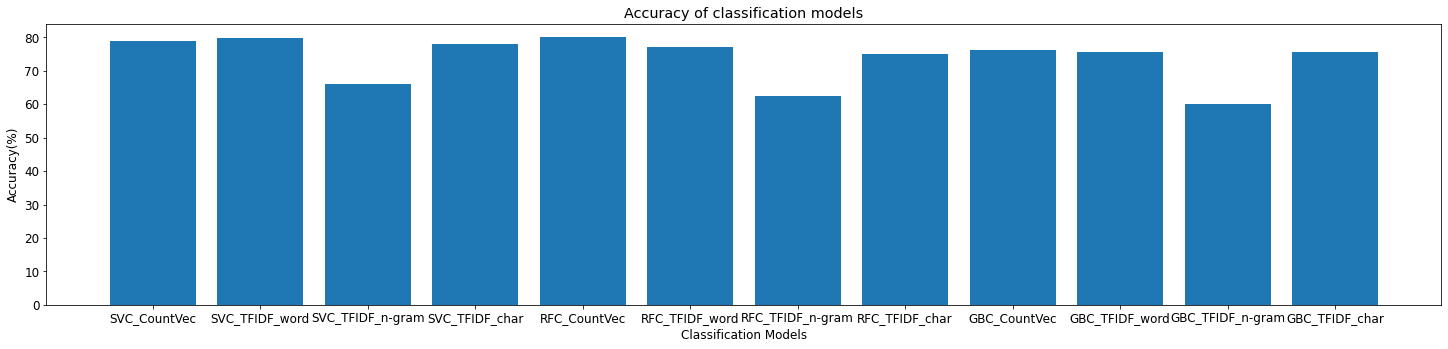

In [126]:
fig = plt.figure(figsize=(25,5))

models=['SVC_CountVec','SVC_TFIDF_word','SVC_TFIDF_n-gram','SVC_TFIDF_char','RFC_CountVec','RFC_TFIDF_word','RFC_TFIDF_n-gram','RFC_TFIDF_char','GBC_CountVec','GBC_TFIDF_word','GBC_TFIDF_n-gram','GBC_TFIDF_char']
Accuracy=[78.8,79.8,66,78.1,80,77,62.6,74.9,76.3,75.7,60,75.7]
F1_score=[79,80,66,78,80,77,63,75,76,76,60,76]
plt.title('Accuracy of classification models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy(%)')
plt.bar(models,Accuracy)

# plt.hist([Accuracy,F1_score], label=['Accuracy', 'F1-score'])
# plt.legend(loc='upper right')

From the above plot we can interpret that, RandomForest Classifier after using CountVectorizer has given highest accuracy which is 80.77,then SupportVector classifier with both CountVectorizer and TF-IDF(word analyzer) follows with accuracies 78.8%,79.8% resp GradientBoosting classifier with n-gram word analyzer is the least accurate model with 60.2%


Text(0, 0.5, 'F1_score(%)')

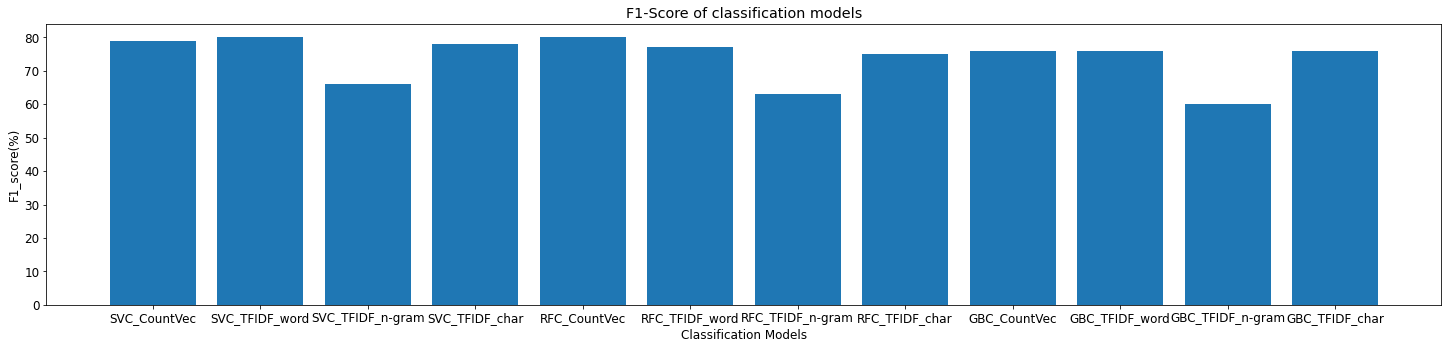

In [129]:
fig = plt.figure(figsize=(25,5))
plt.bar(models,F1_score)
plt.title('F1-Score of classification models')
plt.xlabel('Classification Models')
plt.ylabel('F1_score(%)')

From the above plot, we can observe, RandomForest Classifier after using CountVectorizer  and SupportVector classfier after using word analyzer are accurate with 80% both,
Then SupportVector classifier with CountVectorizer follows with 79%,
GradientBoosting classifier with n-gram word analyzer is the least accurate model with 60%


# Step 7: Trying some usecases to test predict whether our target

Let's try some titles and predict whether it is positive review or negative review:

In [132]:
usecase = ['  good workout short time favorite leave sore strength exercise awhile light ab']

Using SupportVector classifier with countvectorizer:

In [137]:
# B = tfidf.transform(usecase)

# # make predictions based on the test data
# predictions = classifier.predict(B)
# print(predictions)


B1 = counts.transform(usecase)
# make predictions based on the test data
predictions = classifier.predict(B1)
print(predictions)

[0]


Using SupportVector classifier with word analyzer:

In [147]:
B1 = tfidf_vect.transform(usecase)

# make predictions based on the test data
predictions = classifier.predict(B1)
print(predictions)

[0]


Using RandomForest classifier with count vectorizer:

In [141]:
B1 = counts.transform(usecase)
# make predictions based on the test data
predictions = RFclassifier.predict(B1)
print(predictions)

[0]


Hence, as expected all these accurate models predicted the review as postive which is actuall positive